# Car Brand Classification Using ResNet50

In [16]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [18]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of Resnet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [20]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [21]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [22]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

In [24]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [25]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [26]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [27]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [29]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [30]:
# fit the model
# Run the cell.
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\nehak\AppData\Local\Temp\ipykernel_21812\3732704415.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 19s 11s/step - loss: 7.9099 - accuracy: 0.3906 - val_loss: 7.8943 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 15s 11s/step - loss: 4.5406 - accuracy: 0.4375 - val_loss: 5.9993 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 14s 10s/step - loss: 5.2176 - accuracy: 0.3125 - val_loss: 2.2128 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 14s 9s/step - loss: 1.8485 - accuracy: 0.5000 - val_loss: 2.5877 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 14s 10s/step - loss: 2.8851 - accuracy: 0.3906 - val_loss: 1.5172 - val_accuracy: 0.3966
Epoch 6/50
2/2 [==============================] - 14s 10s/step - loss: 1.2015 - accuracy: 0.5938 - val_loss: 2.3095 - val_accuracy: 0.3793
Epoch 7/50
2/2 [==============================] - 14s 10s/step - loss: 2.4605 - accuracy: 0.5156 - val_loss: 2.2532 - val_accuracy: 0.5172
Epoch 8/50
2/2 [============

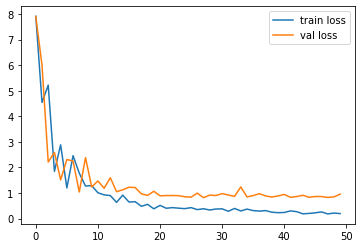

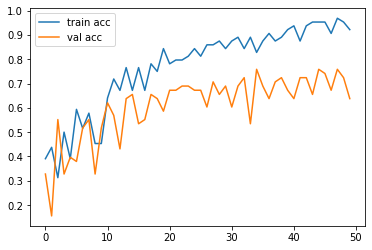

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [49]:
#prediction of test data
y_pred = model.predict(test_set)
y_pred

array([[1.70944124e-01, 2.66440809e-01, 5.62615037e-01],
       [1.44583151e-01, 4.53063428e-01, 4.02353436e-01],
       [1.62087416e-03, 9.84558165e-01, 1.38210161e-02],
       [3.65853831e-02, 8.96917842e-03, 9.54445481e-01],
       [2.48425175e-02, 1.91081315e-01, 7.84076154e-01],
       [2.99515754e-01, 5.33542931e-02, 6.47129893e-01],
       [1.82706360e-02, 3.27216953e-01, 6.54512405e-01],
       [1.37799571e-03, 8.99352729e-01, 9.92693603e-02],
       [3.80266130e-01, 1.65562138e-01, 4.54171777e-01],
       [1.26243848e-03, 9.89038110e-01, 9.69951320e-03],
       [2.58570793e-03, 1.44419014e-01, 8.52995276e-01],
       [1.12601620e-05, 1.06122934e-04, 9.99882579e-01],
       [5.70339821e-02, 4.23640534e-02, 9.00601923e-01],
       [9.88682173e-03, 1.12680905e-03, 9.88986373e-01],
       [1.85312554e-02, 1.32866568e-04, 9.81335878e-01],
       [1.65361278e-02, 9.11783338e-01, 7.16805533e-02],
       [1.42349869e-01, 3.27610373e-01, 5.30039787e-01],
       [1.46762356e-02, 3.12449

In [50]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [51]:
y_pred

array([2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2], dtype=int64)

In [52]:
from tensorflow.keras.models import load_model

In [53]:
from tensorflow.keras.preprocessing import image

In [54]:
model=load_model('model_resnet50.h5')

In [55]:
img=image.load_img('Datasets/Test/lamborghini/22.jpg',target_size=(224,224))

In [56]:
x=image.img_to_array(img)
x

array([[[160., 160., 168.],
        [161., 161., 169.],
        [163., 163., 171.],
        ...,
        [109., 110., 115.],
        [110., 111., 116.],
        [110., 111., 116.]],

       [[160., 160., 168.],
        [161., 161., 169.],
        [163., 163., 171.],
        ...,
        [110., 111., 116.],
        [111., 112., 117.],
        [111., 112., 117.]],

       [[160., 160., 168.],
        [161., 161., 169.],
        [163., 163., 171.],
        ...,
        [110., 111., 116.],
        [111., 112., 117.],
        [111., 112., 117.]],

       ...,

       [[ 46.,  49.,  58.],
        [ 46.,  49.,  58.],
        [ 47.,  50.,  59.],
        ...,
        [ 49.,  52.,  61.],
        [ 49.,  52.,  61.],
        [ 48.,  51.,  60.]],

       [[ 46.,  49.,  58.],
        [ 46.,  49.,  58.],
        [ 47.,  50.,  59.],
        ...,
        [ 49.,  52.,  61.],
        [ 49.,  52.,  61.],
        [ 48.,  51.,  60.]],

       [[ 45.,  47.,  59.],
        [ 46.,  48.,  60.],
        [ 47.,  

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[0.00301386, 0.00788741, 0.9890988 ]], dtype=float32)

In [63]:
img_data

array([[[[-103.28018 , -116.15155 , -123.05255 ],
         [-103.27626 , -116.14763 , -123.04863 ],
         [-103.26842 , -116.139786, -123.04079 ],
         ...,
         [-103.48802 , -116.347626, -123.25255 ],
         [-103.4841  , -116.343704, -123.24863 ],
         [-103.4841  , -116.343704, -123.24863 ]],

        [[-103.28018 , -116.15155 , -123.05255 ],
         [-103.27626 , -116.14763 , -123.04863 ],
         [-103.26842 , -116.139786, -123.04079 ],
         ...,
         [-103.4841  , -116.343704, -123.24863 ],
         [-103.48018 , -116.33978 , -123.244705],
         [-103.48018 , -116.33978 , -123.244705]],

        [[-103.28018 , -116.15155 , -123.05255 ],
         [-103.27626 , -116.14763 , -123.04863 ],
         [-103.26842 , -116.139786, -123.04079 ],
         ...,
         [-103.4841  , -116.343704, -123.24863 ],
         [-103.48018 , -116.33978 , -123.244705],
         [-103.48018 , -116.33978 , -123.244705]],

        ...,

        [[-103.711555, -116.586845, -1

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [62]:
a==1

array([False])